In [69]:
using StatGeochem
using Plots; gr();
using StatsBase
using Statistics

include("run_mcmc.jl")
include("../src/crustDistribution.jl")

Loading crust information from file ../data/crustDistribution.jld


Loading crust information from file ../data/crustDistribution.jld


Main.crustDistribution

In [2]:
## Get average seismic, depth, geotherm pairs

In [98]:
# 3 layers, 5 props / layer 
invert = fill(NaN, (3,5))

# Seismic 
for l in [6,7,8]
    s = mean(hcat(find_crust1_seismic(
                crustDistribution.all_lats, crustDistribution.all_longs, l)...), 
            Weights(crustDistribution.weights), dims=1)
    s[2] = s[1]/s[2]
    invert[l-5,3:5] .= s[:]
end

# Layers and geotherms 
d = mean(crustDistribution.depth, Weights(crustDistribution.weights), dims=1)
# Get middle of each layer
layers = d[2:end]
pushfirst!(layers, 0)
# Each sample is geotherm, layer depth
invert[:,1] .= d[1]
invert[:,2] .= [(layers[i]+layers[i+1])/2 for i in 1:3]

println(invert)

[41.678471017560426 6.909417469309636 6.095079345979234 1.7252766096948702 2728.7077338784757; 41.678471017560426 20.193064518935472 6.413912813979953 1.7366797024951082 2802.8213184333244; 41.678471017560426 32.32255339791592 6.911113915442597 1.75810779522217 2933.306619695041]


In [49]:
runner = MCMCRunner(sample...);

K-means converged with 25 iterations (objv = 25809.576596734034)


┌ Info: Initializing GMM, 11 Gaussians diag covariance 10 dimensions using 1000 data points
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:79
┌ Info: K-means with 1000 data points using 25 iterations
│ 8.3 data points per parameter
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:140


In [50]:
samples, accepted, ll = run_mcmc(200, runner)

Comparing all to -24.10446085190732


Iterating... 14%|█████▋                                 |  ETA: 0:11:18



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 20%|███████▊                               |  ETA: 0:10:17



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 56%|█████████████████████▋                 |  ETA: 0:05:36



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 76%|█████████████████████████████▋         |  ETA: 0:03:00



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 80%|███████████████████████████████        |  ETA: 0:02:34



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 80%|███████████████████████████████▎       |  ETA: 0:02:30



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 83%|████████████████████████████████▍      |  ETA: 0:02:08



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating...100%|███████████████████████████████████████| Time: 0:12:29


([58.6791094474985 0.9524187580876228 … 1.806223344666173 0.596312393254861; 62.388327967439125 0.8629630541182588 … 1.4524533551083105 0.45801138943536035; … ; 71.6291084237036 0.34915516454615636 … 0.808620781868315 1.0090868361950587; 71.6291084237036 0.34915516454615636 … 0.808620781868315 1.0090868361950587], Bool[0, 1, 1, 0, 1, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [-24.10446085190732, -20.924290183673516, -21.760399884205455, -21.760399884205455, -20.711742590938357, -20.711742590938357, -19.818037093332563, -19.818037093332563, -19.818037093332563, -19.818037093332563  …  -18.450781117048642, -18.450781117048642, -18.450781117048642, -18.450781117048642, -18.450781117048642, -18.450781117048642, -18.450781117048642, -18.450781117048642, -18.450781117048642, -18.450781117048642])

In [ ]:
ign, h = readdlm("../data/remote/base_nobin/bsr_ignmajors_1.csv", ',', header=true)

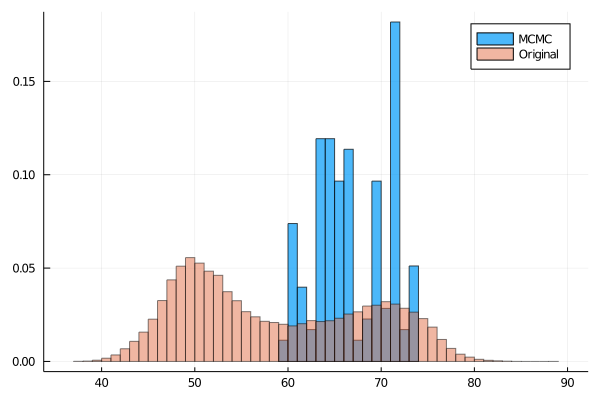

In [56]:
histogram(samples[25:end,1], normalize=:pdf, label="MCMC", alpha=.7, nbins=20)
histogram!(ign[:,2], normalize=:pdf, label="Original", alpha=.5)

In [29]:
layer = 7
datm = hcat(crustDistribution.depth[:,1], (crustDistribution.depth[:,3] .- crustDistribution.depth[:,2])./2 .+ crustDistribution.depth[:,2], 
    find_crust1_seismic(crustDistribution.all_lats, crustDistribution.all_longs, layer)...)
# go from vs to vp/vs
datm[:,4] .= datm[:,3] ./ datm[:,4]

println(size(unique(datm, dims=1)))
samplem = datm[1,:]
println(samplem)

(19101, 5)
[36.0, 18.935000000000002, 6.3, 1.740331491712707, 2740.0]


In [31]:
runnerm = MCMCRunner(samplem...);

K-means converged with 26 iterations (objv = 24362.055256810203)


┌ Info: Initializing GMM, 11 Gaussians diag covariance 10 dimensions using 1000 data points
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:79
┌ Info: K-means with 1000 data points using 26 iterations
│ 8.3 data points per parameter
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:140


In [32]:
samplesm, acceptedm, llm = run_mcmc(200, runnerm)

Comparing all to -20.825853378778525


Iterating... 66%|█████████████████████████▌             |  ETA: 0:05:41



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating... 73%|████████████████████████████▌          |  ETA: 0:04:26



Cannot process sample due to 
 ParsePerplexError("Endmembers do not sum to 1")


Iterating...100%|███████████████████████████████████████| Time: 0:16:18


([58.6791094474985 0.9524187580876228 … 1.806223344666173 0.596312393254861; 60.34415984311794 0.959282166637924 … 1.951894543161763 0.6579728670039813; … ; 62.41279387578889 0.46604138614708923 … 0.9805224682634911 0.11349815656092996; 62.41279387578889 0.46604138614708923 … 0.9805224682634911 0.11349815656092996], Bool[0, 1, 0, 1, 0, 0, 0, 1, 1, 0  …  1, 0, 0, 0, 0, 1, 0, 1, 0, 0], [-20.825853378778525, -21.5188809268804, -21.5188809268804, -21.40307732792578, -21.40307732792578, -21.40307732792578, -21.40307732792578, -21.67051156117214, -21.187055640796316, -21.187055640796316  …  -24.454069710966326, -24.454069710966326, -24.454069710966326, -24.454069710966326, -24.454069710966326, -22.044881439951446, -22.044881439951446, -24.60286721370978, -24.60286721370978, -24.60286721370978])

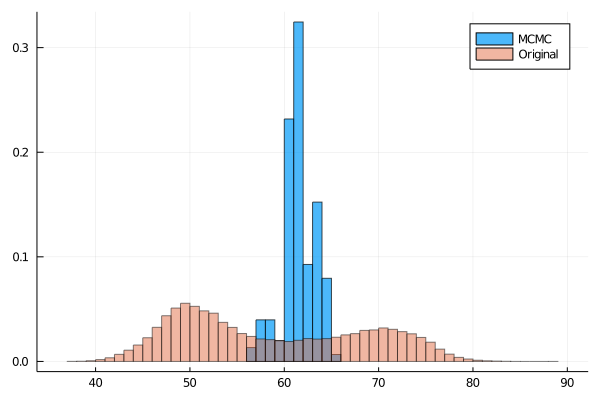

In [42]:
histogram(samplesm[50:end,1], normalize=:pdf, label="MCMC", alpha=.7)
histogram!(ign[:,2], normalize=:pdf, label="Original", alpha=.5)

In [34]:
layer = 8
datl = hcat(crustDistribution.depth[:,1], (crustDistribution.depth[:,4] .- crustDistribution.depth[:,3])./2 .+ crustDistribution.depth[:,3], 
    find_crust1_seismic(crustDistribution.all_lats, crustDistribution.all_longs, layer)...)
# go from vs to vp/vs
datl[:,4] .= datl[:,3] ./ datl[:,4]

println(size(unique(datl, dims=1)))
samplel = datl[1,:]
println(samplel)

(19841, 5)
[36.0, 30.41, 6.9, 1.7829457364341086, 2910.0]


In [35]:
runnerl = MCMCRunner(samplel...);

K-means converged with 30 iterations (objv = 28500.89209437652)


┌ Info: Initializing GMM, 11 Gaussians diag covariance 10 dimensions using 1000 data points
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:79
┌ Info: K-means with 1000 data points using 30 iterations
│ 8.3 data points per parameter
└ @ GaussianMixtures /Users/gailin/.julia/packages/GaussianMixtures/1pQcF/src/train.jl:140


In [41]:
samplesl, acceptedl, ll_l = run_mcmc(200, runnerl)

Comparing all to -23.479069578148255


Iterating...100%|███████████████████████████████████████| Time: 0:12:33


([58.6791094474985 0.9524187580876228 … 1.806223344666173 0.596312393254861; 58.6791094474985 0.9524187580876228 … 1.806223344666173 0.596312393254861; … ; 61.51849907419725 0.5692790288021823 … 1.713981770354117 0.6787872130714183; 61.51849907419725 0.5692790288021823 … 1.713981770354117 0.6787872130714183], Bool[0, 0, 1, 0, 0, 1, 0, 0, 0, 1  …  0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [-23.479069578148255, -23.479069578148255, -23.650504804520526, -23.650504804520526, -23.650504804520526, -23.822828622927197, -23.822828622927197, -23.822828622927197, -23.822828622927197, -23.021427539569576  …  -21.57464722716607, -21.57464722716607, -21.57464722716607, -21.57464722716607, -21.57464722716607, -21.57464722716607, -21.57464722716607, -22.747658870742292, -22.747658870742292, -22.747658870742292])

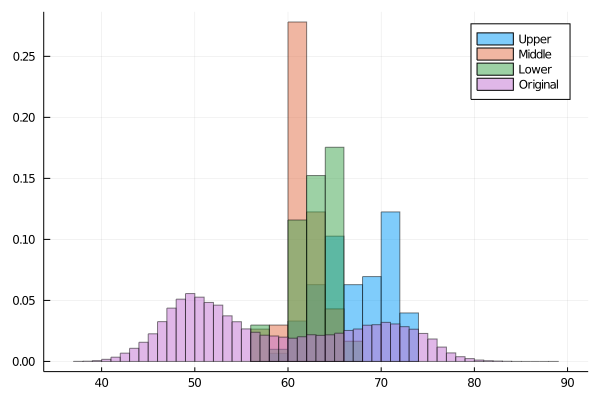

In [63]:
histogram(samples[50:end,1], normalize=:pdf, label="Upper", alpha=0.5, nbins=10)
histogram!(samplesm[50:end,1], normalize=:pdf, label="Middle", alpha=.5, nbins=5)
histogram!(samplesl[50:end,1], normalize=:pdf, label="Lower", alpha=.5, nbins=10)
histogram!(ign[:,2], normalize=:pdf, label="Original", alpha=.5)

In [52]:
samples

200×10 Array{Float64,2}:
 58.6791  0.952419  14.5812  7.24179  4.85953  …  2.14296  1.80622   0.596312
 62.3883  0.862963  15.1544  5.3993   4.29942     1.79568  1.45245   0.458011
 62.4362  0.892993  14.2675  4.7143   4.81517     2.00769  1.59979   0.499762
 62.4362  0.892993  14.2675  4.7143   4.81517     2.00769  1.59979   0.499762
 61.2685  1.04303   15.2022  4.63814  4.32477     2.58774  1.65215   0.45306
 61.2685  1.04303   15.2022  4.63814  4.32477  …  2.58774  1.65215   0.45306
 64.1057  0.805216  15.1984  4.8862   3.94189     2.2502   1.16926   0.417749
 64.1057  0.805216  15.1984  4.8862   3.94189     2.2502   1.16926   0.417749
 64.1057  0.805216  15.1984  4.8862   3.94189     2.2502   1.16926   0.417749
 64.1057  0.805216  15.1984  4.8862   3.94189     2.2502   1.16926   0.417749
 64.1057  0.805216  15.1984  4.8862   3.94189  …  2.2502   1.16926   0.417749
 64.1057  0.805216  15.1984  4.8862   3.94189     2.2502   1.16926   0.417749
 63.8373  0.81276   16.491   5.03251  2.7

In [65]:
println(sample)
println(samplem)
println(samplel)

[36.0, 6.6, 5.9, 1.7151162790697676, 2670.0]
[36.0, 18.935000000000002, 6.3, 1.740331491712707, 2740.0]
[36.0, 30.41, 6.9, 1.7829457364341086, 2910.0]


In [91]:
d = mean(crustDistribution.depth, Weights(crustDistribution.weights), dims=1)
layers = d[2:end]
println(d)
pushfirst!(layers, 0)
d[2:end] = [(layers[i]+layers[i+1])/2 for i in 1:3]
println(d)

[41.678471017560426 13.818834938619272 26.56729409925167 38.07781269658017]
[41.678471017560426 6.909417469309636 20.193064518935472 32.32255339791592]


In [88]:
for l in [6,7,8]
    s = mean(hcat(find_crust1_seismic(
                crustDistribution.all_lats, crustDistribution.all_longs, l)...), 
            Weights(crustDistribution.weights), dims=1)
    s[2] = s[1]/s[2]
    println(s)
end


[6.095079345979234 1.7252766096948702 2728.7077338784757]
[6.413912813979953 1.7366797024951082 2802.8213184333244]
[6.911113915442597 1.75810779522217 2933.306619695041]
